## Importación de librerías

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

## Instalación del paquete Ultralytics

Este comando instala la librería 'ultralytics', la cual proporciona herramientas para entrenar y utilizar modelos YOLO (You Only Look Once),
incluyendo YOLOv8.

In [ ]:
!pip install -U ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

## Montar Google Drive en el entorno de Colab
Utilizamos esta línea porque el dataset ha sido almacenado en Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Descomprimir el dataset desde Google Drive

Esta línea extrae el contenido del conjunto de datos que fue almacenado en Google Drive para que pueda ser utilizado por el modelo YOLOv8 durante el proceso de entrenamiento y evaluación.

En total se descomprimieron 428 imágenes:
  * 410 para entrenamiento
  * 9 para validación
  * 9 para prueba

In [ ]:

!unzip "/content/drive/MyDrive/data_set_vision_computacional/ProyectoFinal_v4.v3i.yolov8"

Archive:  /content/drive/MyDrive/data_set_vision_computacional/ProyectoFinal_v4.v3i.yolov8.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/mano1_jpg.rf.412d192985a4a664e97f1b6af025a282.jpg  
 extracting: test/images/mano2_jpg.rf.c117b8d4aded48bc32874efca4a0e415.jpg  
 extracting: test/images/mano30_jpg.rf.17bbddceff101223a754da48fce297e0.jpg  
 extracting: test/images/mano_1_jpg.rf.a1408dd5e514a60821b1f389fb44511a.jpg  
 extracting: test/images/mano_5_jpg.rf.214dc04ac20d43eede3ae55cb305d6e8.jpg  
 extracting: test/images/puno27_jpg.rf.0c8bc4c5c1bd4e7366c00742b28e1336.jpg  
 extracting: test/images/puno35_jpg.rf.a67c3b1e01ad6ce0ada96a868ab8f488.jpg  
 extracting: test/images/puno7_jpg.rf.c5d8c10518232b459a3f96bf691db446.jpg  
 extracting: test/images/puno_3_jpg.rf.71251e31c7a6a97c27b64a524f3c54cc.jpg  
   creating: test/labels/
  inflating: test/lab

## Impotacion del módulo principal YOLO

verificación (`ultralytics.checks()`) confirma que todas las dependencias necesarias están instaladas correctamente.

In [ ]:

from ultralytics import YOLO
import ultralytics
ultralytics.checks()

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.4/112.6 GB disk)


## Establecer variable HOME
se establece una variable llamada HOME que apunta al directorio principal en Google Colab (`/content/`). Esto facilitara la gestión de rutas al guardar o acceder a archivos durante el entrenamiento y la inferencia del modelo.

In [ ]:
HOME = "/content/"

## Parámetros principales para el entrenamiento:

* **task=segment** parámetro que indica que la tarea que se quiere resolver es la segmentación de instancias.

* **model=yolov8s-seg.pt** Se selecciona el modelo YOLOv8 Small con capacidad para segmentación (-seg).

* **mode=train** Modo que indica que la tarea sera de entrenamiento del modelo.

* **data=/content/data.yaml** Archivo de configuración del dataset. Este archivo yaml contiene la ruta a las imágenes de entrenamiento y validación, así como las clases ("palma" y "puno").

* **epochs=200** El modelo se entrenará durante 200 épocas.

* **imgsz=640** Redimensionar las imagenes a 640 × 640 píxeles.



In [ ]:
%cd {HOME}
!yolo task=segment model=yolov8s-seg.pt mode=train data=/content/data.yaml epochs=200 imgsz=640

/content
100% 22.8M/22.8M [00:00<00:00, 116MB/s]
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspe

## Resultados del Entrenamiento

El modelo fue entrenado durante 122 épocas, con parada anticipada activada (EarlyStopping) al no observarse mejoras significativas durante las últimas 100 épocas. El mejor desempeño se alcanzó en la época 22, y el modelo correspondiente se guardó como best.pt.

En la validación, el modelo YOLOv8s-seg mostró un buen rendimiento:

| Métrica                    | Valor  |
|----------------------------|--------|
| Precisión (Box) global     | 0.836  |
| Recall (Box) global        | 0.840  |
| mAP@0.5 (Box)              | 0.933  |
| Precisión (Máscara) global | 0.836  |
| Recall (Máscara) global    | 0.840  |
| mAP@0.5 (Máscara)          | 0.933  |

#### Métricas por Clase

| Clase | Precisión | mAP@0.5 |
|-------|-----------|---------|
| Palma | 1.000     | 0.995   |
| Puño  | 0.671     | 0.870   |

Esto indica que el modelo identifica con gran precisión la clase palma, mientras que tiene un rendimiento algo inferior con la clase puño, posiblemente debido a mayor variabilidad en la forma o condiciones de captura.

El tiempo promedio por imagen fue:

| Tipo | tiempo |
|-------|-----------|
| Preprocesamiento | 0.2 ms    |
| Inferencia  | 5.2 ms     |
| Postproceso  | 1.8 ms     |



## Importación para mostrar imágenes en Colab

In [ ]:
from IPython.display import display, Image

## carga y mostrar imagen
solo mostramos la matriz de confusión

/content


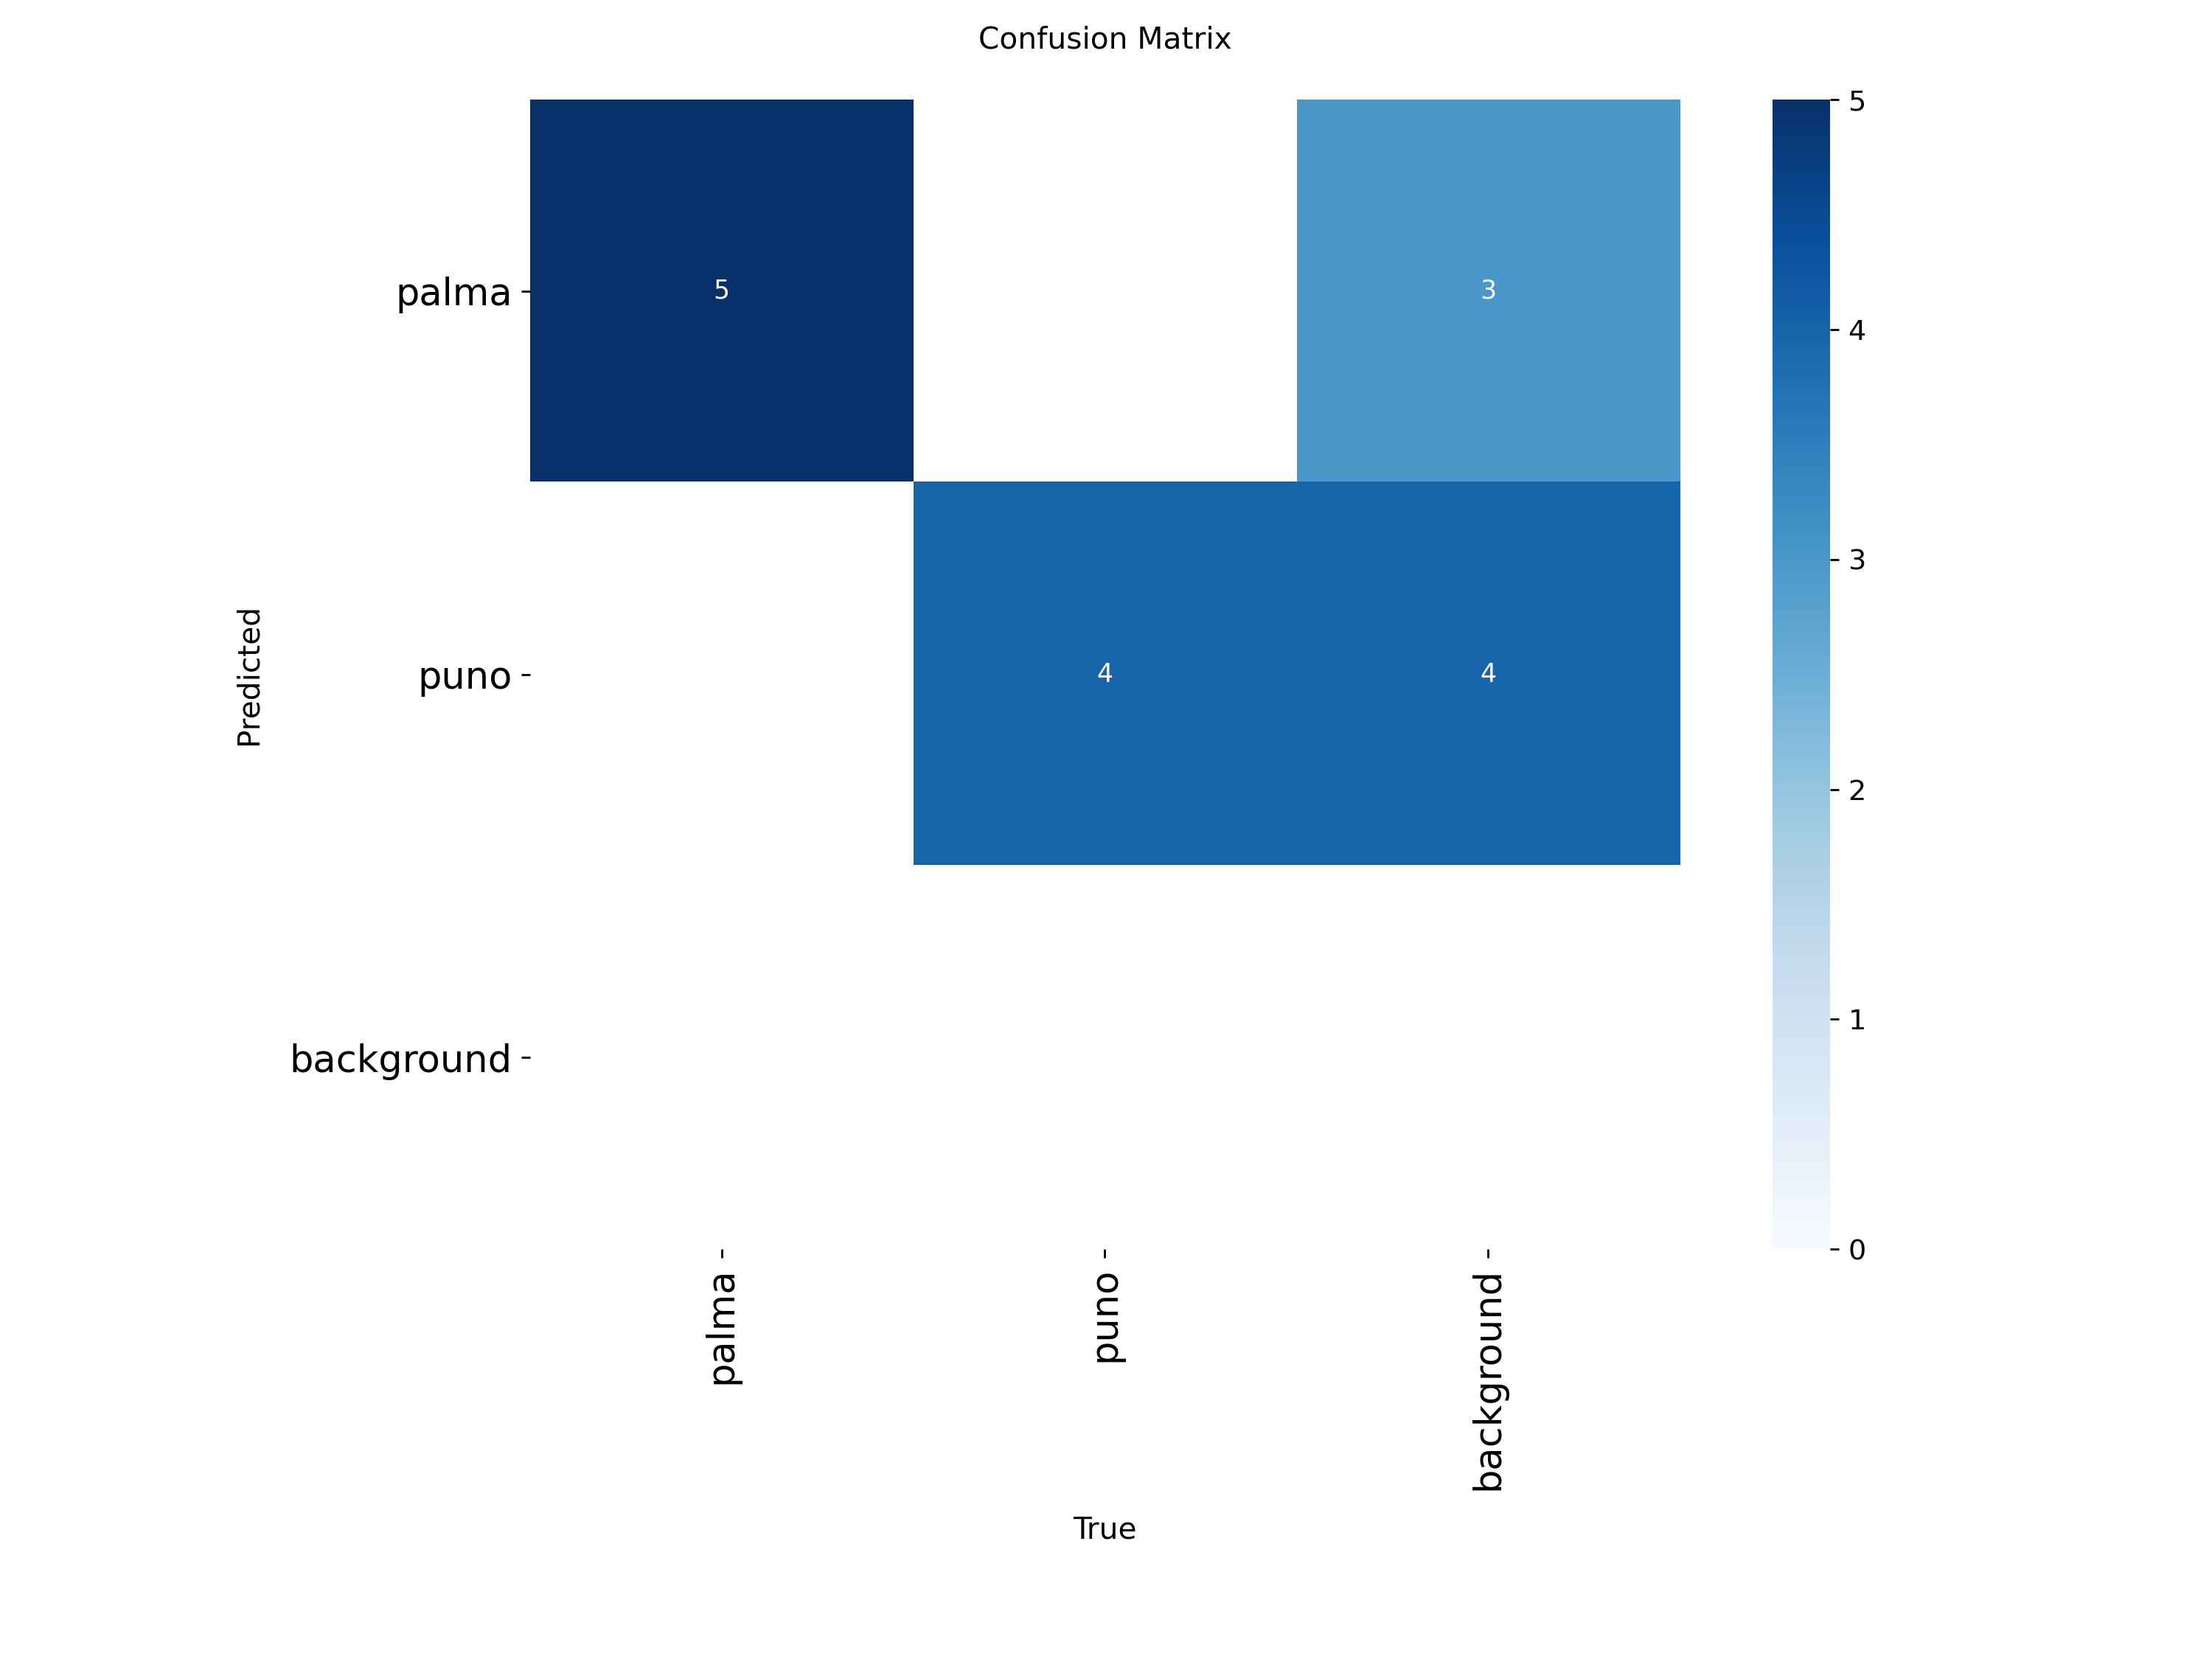

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

## Estructura de la Matriz de Confusión
La matriz de confusión está organizada en tres clases:

palma: Clase representando imágenes de la mano abierta.
puño: Clase representando imágenes de la mano cerrada.
background: Clase representando el fondo o entorno en que aparecen las manos.

## Interpretación de Resultados
* predicciones correctas:

  * palma: 5 imágenes fueron correctamente clasificadas como "palma".
  * puño: 4 imágenes fueron correctamente clasificadas como "puño".

* predicciones incorrectas:

  * palma como puño: El modelo confundió 3 imágenes de "palma" con "puño".
  * puño como palma: El modelo confundió 4 imágenes de "puño" con "palma".
  * background: no se observan errores relacionados con el fondo

## carga y mostrar imagen
solo mostramos los resultados del entrenamiento

/content


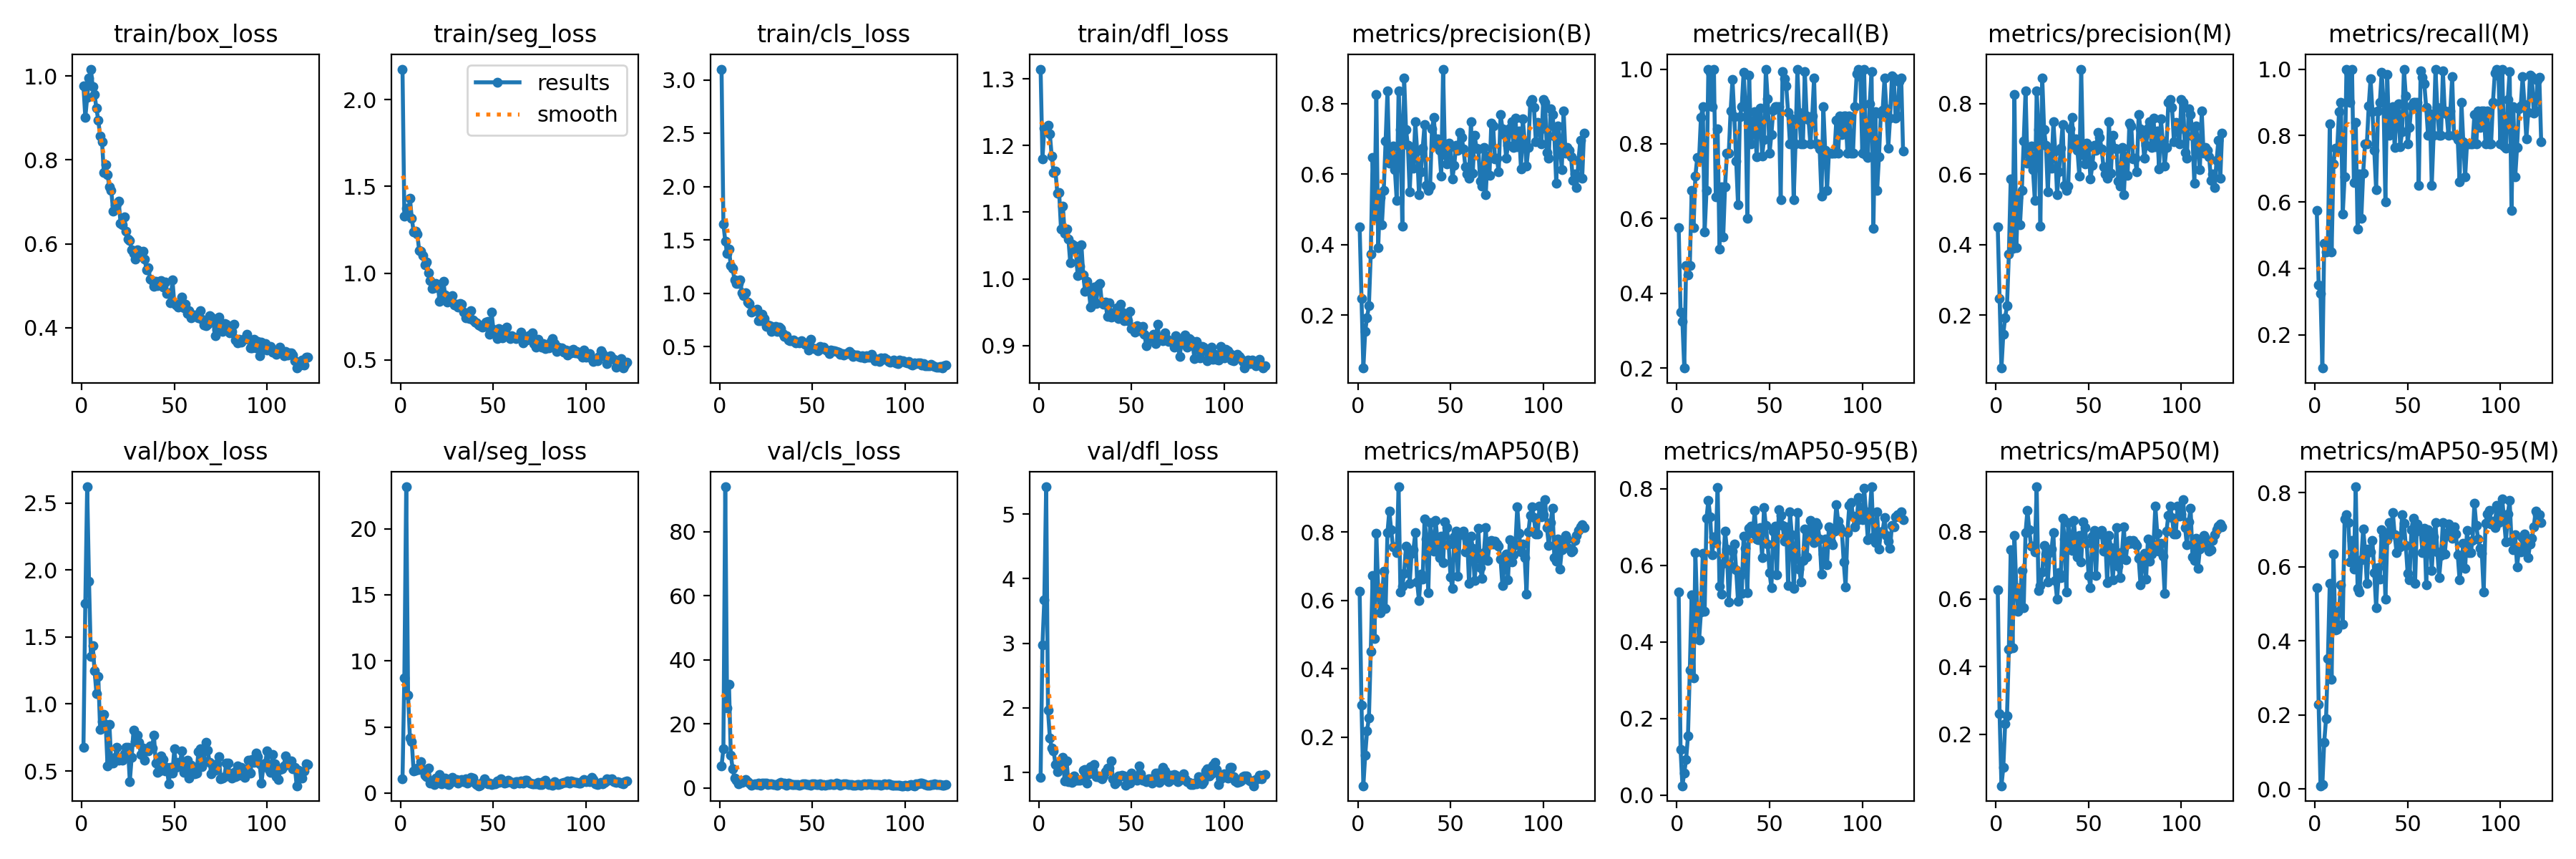

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=1000)

## Resumen de Resultados de Entrenamiento

### Pérdidas:

Las pérdidas de entrenamiento (box_loss, seg_loss, cls_loss, dfl_loss) muestran una tendencia a la baja, indicando que el modelo mejora con el tiempo.
Las pérdidas de validación también disminuyen, sugiriendo que el modelo generaliza bien sin sobreajuste.

### Métricas:

Precisión y Recall:
* La clase "palma" muestra excelentes métricas, reflejando buena detección (precisión cerca de 1.0).
* La clase "puño" tiene un rendimiento menor, indicando confusiones en su identificación.

mAP (mean Average Precision):
* Valores de mAP son altos, lo que sugiere un buen rendimiento general del modelo en localización y clasificación.

### Tiempos:

El tiempo promedio por imagen es:
* Preprocesamiento: 0.2 ms
* Inferencia: 5.2 ms
* Postproceso: 1.8 ms

## Ejecución de Validación del Modelo

* **task=segment:** Especifica la tarea que se desea realizar, en este caso, la segmentación.

* **mode=val:** Establece el modo de ejecución a validación.

* **model="/content/runs/segment/train/weights/best.pt":** Esta es la ruta al archivo del modelo que se quiere evaluar (contiene los pesos).

* **data="/content/data.yaml":** Especifica el archivo de configuración del conjunto de datos. Este archivo debe contener la información necesaria para cargar las imágenes y definir las clases ("palma" y "puno").

In [ ]:
!yolo task=segment mode=val model="/content/runs/segment/train/weights/best.pt" data="/content/data.yaml"

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,374 parameters, 0 gradients, 42.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1165.3±324.6 MB/s, size: 28.3 KB)
val: Scanning /content/valid/labels.cache... 9 images, 0 backgrounds, 0 corrupt: 100% 9/9 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.97it/s]
                   all          9          9      0.836       0.84      0.933      0.803      0.836       0.84      0.933      0.816
                 palma          5          5          1      0.931      0.995      0.864          1      0.931      0.995      0.841
                  puno          4          4      0.671       0.75       0.87      0.743      0.671       0.75       0.87      0.792
Speed: 0.3ms preprocess, 18.7ms inference, 0.0ms loss, 18.4ms postproce

## Resultados de Validación

Una vez completado el entrenamiento, se evaluó el desempeño del modelo en el conjunto de validación. A continuación se presentan las métricas más relevantes:

### Métricas Globales

| Métrica                          | Valor  |
|----------------------------------|--------|
| Precisión (Box) global           | 0.836  |
| Recall (Box) global              | 0.840  |
| mAP@0.5 (Box)                    | 0.933  |
| Precisión (Máscara) global       | 0.803  |
| Recall (Máscara) global          | 0.836  |
| mAP@0.5 (Máscara)                | 0.816  |

Estas métricas indican que el modelo no solo detecta correctamente la mayoría de los gestos, sino que también logra segmentar sus formas con una buena precisión. El valor de **mAP@0.5** representa el promedio de precisión permitido con una superposición del 50% entre la predicción y la etiqueta real, mientras que **mAP@0.5:0.95** es una métrica más rigurosa que promedia sobre varios umbrales de superposición.

### Métricas por Clase

| Clase | Imágenes | Precisión | mAP@0.5 |
|-------|----------|-----------|---------|
| Palma | 5        | 1.000     | 0.995   |
| Puño  | 4        | 0.671     | 0.870   |

Esto muestra que el modelo identifica con gran precisión la clase "palma", mientras que su rendimiento en la clase "puño" es más bajo, posiblemente debido a la mayor variabilidad en la forma y las condiciones de captura.

### Tiempo Promedio por Imagen

El tiempo promedio por imagen durante la validación fue:

| Tipo               | Tiempo  |
|--------------------|---------|
| Preprocesamiento   | 0.3 ms  |
| Inferencia         | 18.7 ms |
| Postproceso        | 18.4 ms |

Estos tiempos reflejan la eficiencia del modelo en la inferencia. A pesar del mayor tiempo de inferencia, los resultados de precisión y recall son alentadores.

## Resultados visuales
A continuación, se muestran algunos ejemplos visuales de las predicciones del modelo sobre imágenes reales del conjunto de prueba. En ellas se puede observar cómo el modelo identifica correctamente tanto la clase (palma o puño) como su contorno.

### Ejemplo 1 - Palma detectada con el 0.1 de confianza

In [ ]:
###
!yolo task=segment mode=predict model="/content/runs/segment/train/weights/best.pt" conf=0.1 source="/content/mano_abierta_prueba.jpg"


Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,374 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /content/mano_abierta_prueba.jpg: 640x480 1 palma, 48.7ms
Speed: 3.4ms preprocess, 48.7ms inference, 170.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


### Detalles de la Predicción
Imagen Procesada:
* Ruta: /content/mano_abierta_prueba.jpg
* Dimensiones de entrada: 640x480 píxeles.

Resultados:
* Detección: Se detectó 1 palma durante la predicción.

Tiempos de Ejecución:

* Preprocesamiento: 3.4 ms
* Inferencia: 48.7 ms
* Postproceso: 170.5 ms
* Forma de entrada: (1, 3, 640, 480)

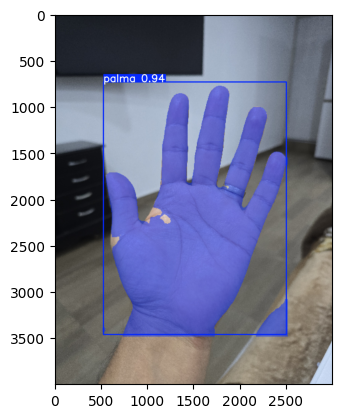

In [ ]:
import matplotlib.pyplot as plt

im = plt.imread("/content/runs/segment/predict/mano_abierta_prueba.jpg")
plt.imshow(im)
plt.show()

### Ejemplo 2 - Palma detectada con el 0.8 de confianza

In [ ]:
###
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.8 source=/content/mano_abierta_prueba.jpg save=true
##

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,374 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /content/mano_abierta_prueba.jpg: 640x480 1 palma, 87.8ms
Speed: 4.9ms preprocess, 87.8ms inference, 204.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


### Detalles de la Predicción
Imagen Procesada:
* Ruta: /content/mano_abierta_prueba.jpg
* Dimensiones de entrada: 640x480 píxeles.

Resultados:
* Detección: Se detectó 1 palma durante la predicción.

Tiempos de Ejecución:
* Preprocesamiento: 4.9 ms
* Inferencia: 87.8 ms
* Postproceso: 204.6 ms
* Forma de entrada: (1, 3, 640, 480)

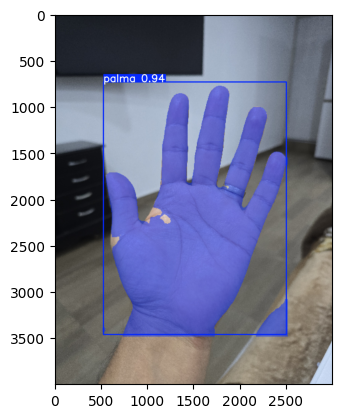

In [ ]:
import matplotlib.pyplot as plt

im = plt.imread("/content/runs/segment/predict7/mano_abierta_prueba.jpg")
plt.imshow(im)
plt.show()

### Ejemplo 3 - Puño detectado con el 0.1 de confianza

In [ ]:
###
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.1 source=/content/puno.jpg save=true
##

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,374 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /content/puno.jpg: 640x480 3 punos, 65.4ms
Speed: 4.3ms preprocess, 65.4ms inference, 156.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


### Detalles de la Predicción
Imagen Procesada:
* Ruta: /content/puno.jpg
* Dimensiones de entrada: 640x480 píxeles.

Resultados:
* Detección: Se detectaron 3 puños durante la predicción.

Tiempos de Ejecución
* Preprocesamiento: 4.3 ms
* Inferencia: 65.4 ms
* Postproceso: 156.7 ms
* Forma de entrada: (1, 3, 640, 480)

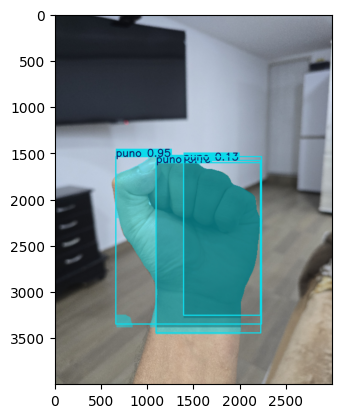

In [ ]:
import matplotlib.pyplot as plt

im = plt.imread("/content/runs/segment/predict3/puno.jpg")
plt.imshow(im)
plt.show()

### Ejemplo 4 - Puño detectado con el 0.8 de confianza

In [ ]:
###
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.8 source=/content/puno.jpg save=true
##

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,374 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /content/puno.jpg: 640x480 1 puno, 48.6ms
Speed: 3.3ms preprocess, 48.6ms inference, 146.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict8
💡 Learn more at https://docs.ultralytics.com/modes/predict


### Detalles de la Predicción
Imagen Procesada:
* Ruta: /content/puno.jpg
* Dimensiones de entrada: 640x480 píxeles.

Resultados:
* Detección: Se detectó 1 puño en la imagen.

Tiempos de Ejecución
* Preprocesamiento: 3.3 ms
* Inferencia: 48.6 ms
* Postproceso: 146.2 ms
* Forma de entrada: (1, 3, 640, 480)

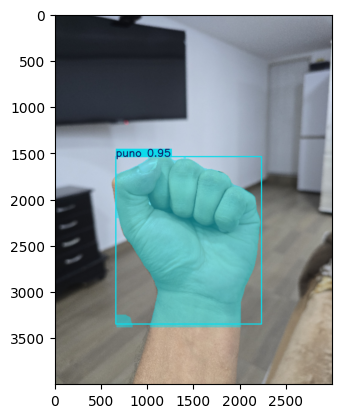

In [ ]:
import matplotlib.pyplot as plt

im = plt.imread("/content/runs/segment/predict8/puno.jpg")
plt.imshow(im)
plt.show()